In [1]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np


In [222]:
import matplotlib.pyplot as plt

In [43]:
import pandas as pd

In [4]:
import seaborn as sns

## Задание 3

Создаем пустой датафрейм, куда будем складывать полученные веса для признаков при разных коэффициентах регуляризации  

In [240]:
weights = pd.DataFrame(columns=["weight"])
weights

,weight


In [242]:
data, target = load_diabetes(as_frame= True, return_X_y=True)
a = 1e-6
n = 50
alpha_linspace = np.linspace(a, 1, n)
for i in range(0,n):
    lm = Lasso(alpha_linspace[i])
    lm.fit(data, target)
    weights = pd.concat([weights,pd.DataFrame(np.transpose(lm.coef_.tolist()),columns=["weight"])], ignore_index=True) #Для каждой альфы получили равное количеству признаков
                                                                                                                       #количество весов, сгрузили в общий датафрейм

In [243]:
weights

,weight
0,-10.008853
1,-239.814724
2,519.846342
3,324.383684
4,-792.103690
...,...
495,0.000000
496,-0.000000
497,0.000000
498,307.605418


Выше отображён датафрейм, содержащий n=50 записей (для каждого альфа) по 10 весов признаков

In [249]:
alphas = pd.DataFrame(alpha_linspace.repeat(data.shape[1]), columns=["alpha"])
alphas  # Получили датафрейм альф - 50 разных, каждая повторяется 10 раз, чтобы соединить таблицы с признаками, альфами и весами далее

,alpha
0,0.000001
1,0.000001
2,0.000001
3,0.000001
4,0.000001
...,...
495,1.000000
496,1.000000
497,1.000000
498,1.000000


In [250]:
good_table = pd.DataFrame(data.columns.to_list()*n,columns=["category"])
good_table  # Таблица с 10 разными признаками, умножили на количество альф, для соединения таблиц далее

,category
0,age
1,sex
2,bmi
3,bp
4,s1
...,...
495,s2
496,s3
497,s4
498,s5


Соединим теперь все таблицы. Получим таблицу, в которой для каждого значения альфа измеряется вес каждого из признаков нашей регрессии

In [257]:
join = pd.concat([alphas, good_table, weights],axis=1)
join

,alpha,category,weight
0,0.000001,age,-10.008853
1,0.000001,sex,-239.814724
2,0.000001,bmi,519.846342
3,0.000001,bp,324.383684
4,0.000001,s1,-792.103690
...,...,...,...
495,1.000000,s2,0.000000
496,1.000000,s3,-0.000000
497,1.000000,s4,0.000000
498,1.000000,s5,307.605418


Построим столбчатые диаграммы для каждого из коэффициентов регуляризации альфа

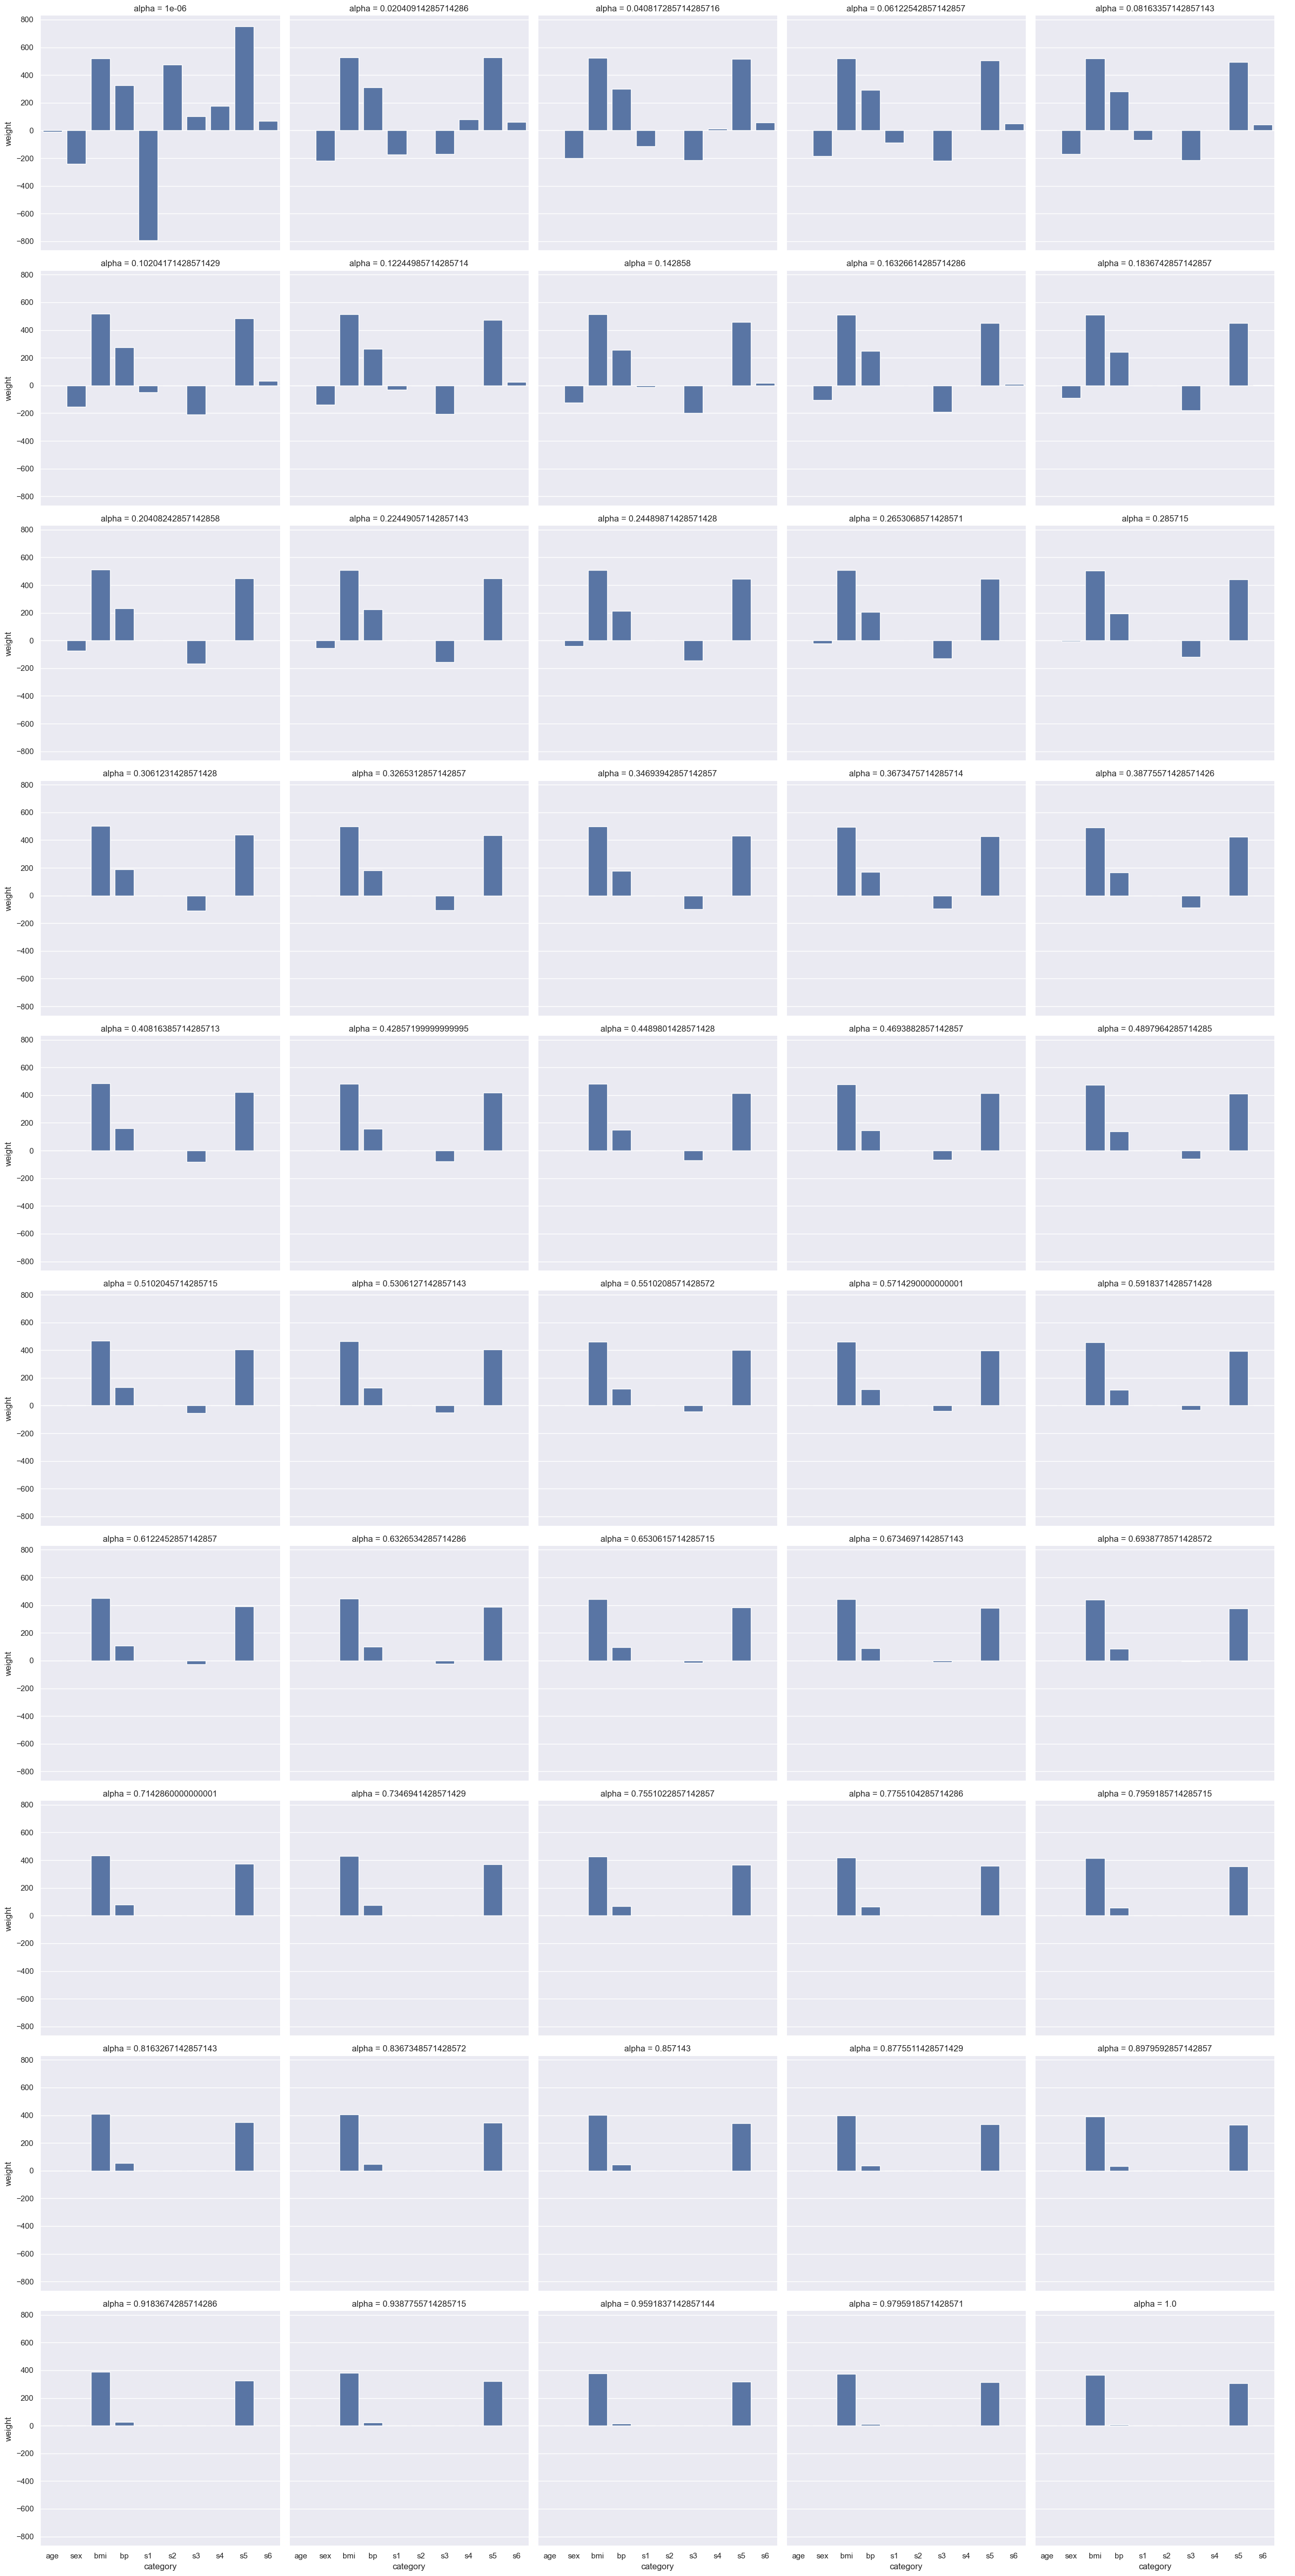

In [256]:
sns.catplot(data = join, kind='bar', x = 'category', y = 'weight', col='alpha', col_wrap=5)


Итого, можем пронаблюдать, как при постепенном увеличении коэффициента регуляризации зануляются веса признаков, и остаётся всего лишь пара-тройка ненулевых признаков